# <a id='1'>Problem Statement : Lending Club Case Study</a>

### :-Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). 
### :-Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. 
### :-In other words, borrowers who default cause the largest amount of loss to the lenders. 

## Business Objectives

### :-In other words, the company wants to understand the driving factors (or driver variables) behind loan default. 
### :-The variables which are strong indicators of default.  
### :-The company can utilise this knowledge for its portfolio and risk assessment. 

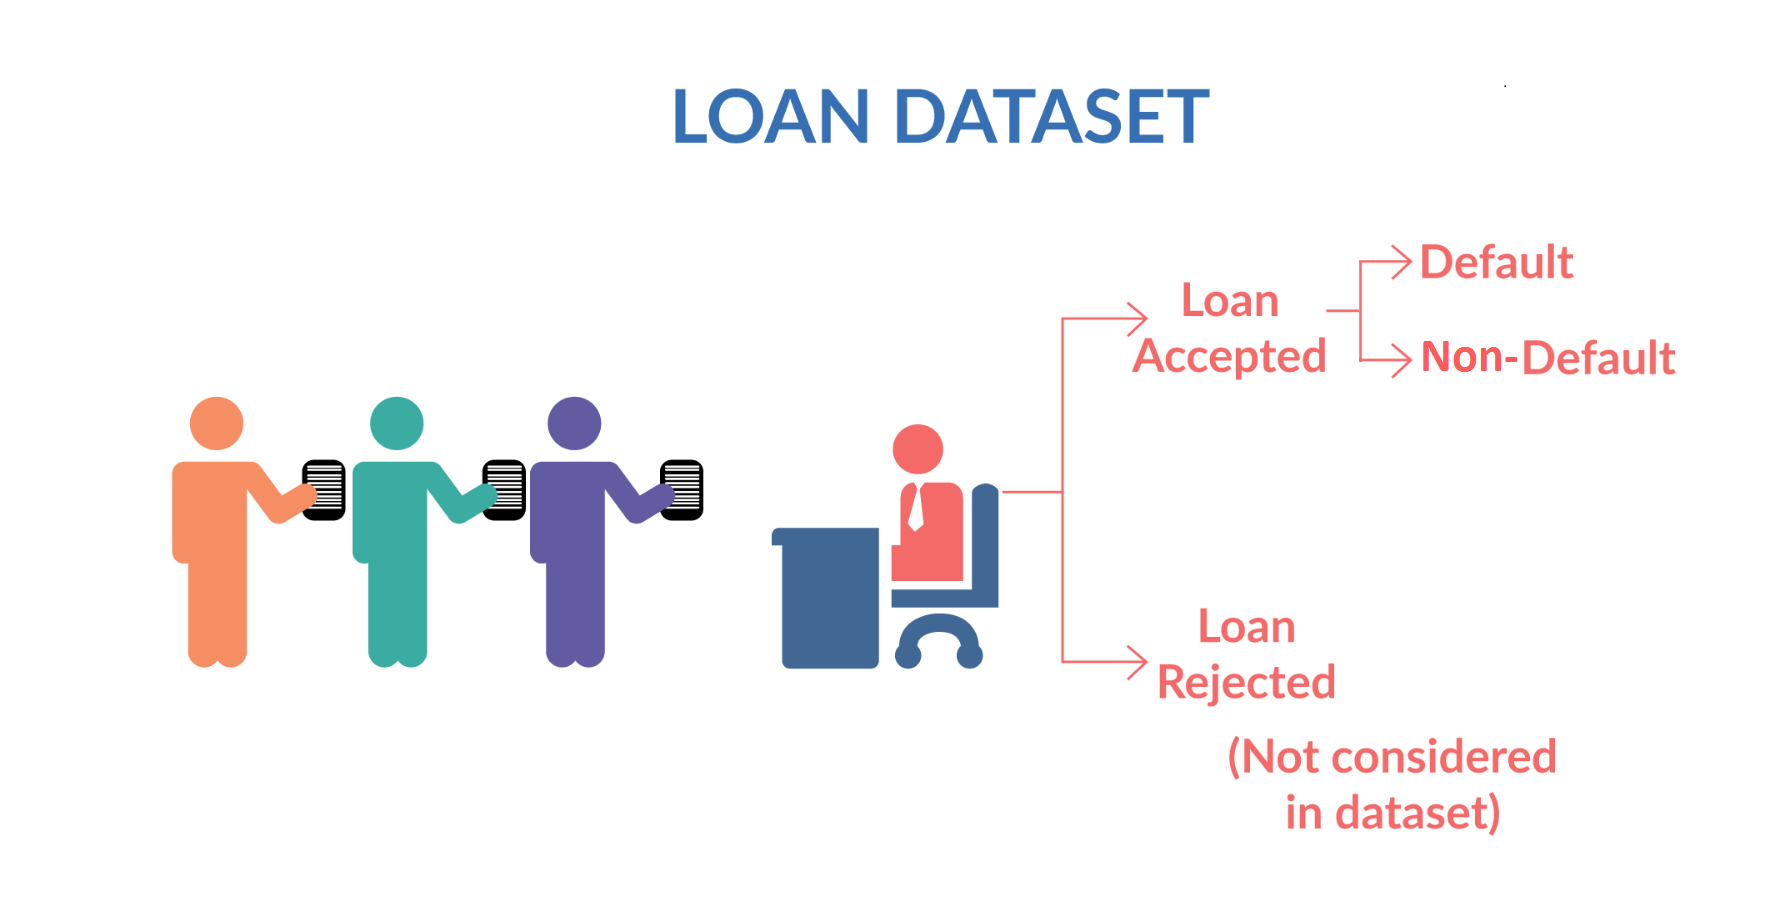

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
from plotly.offline import init_notebook_mode, iplot
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

# <a id='1'>1.Data</a>

In [3]:
loan = pd.read_csv('loan.csv')
# 10 Sample Data
loan.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
19071,681341,870345,8800,8800,8775.000000,36 months,7.29%,272.89,A,A4,IBM,8 years,MORTGAGE,103000.0,Not Verified,Feb-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 02/22/11 > Combining credi...,debt_consolidation,Pay those Cards Off!!,281xx,NC,9.89,0,Nov-00,1,NaN,NaN,16,0,13372,29.40%,24,f,0.0,0.0,9823.911151,9796.00,8800.00,1023.91,0.000000,0.0,0.0,Mar-14,290.58,NaN,Mar-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
17490,714792,908256,16000,16000,16000.000000,60 months,13.43%,367.59,C,C3,NBC Universal,6 years,RENT,68000.0,Source Verified,Mar-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt Consolidation Loan,100xx,NY,8.06,0,Mar-01,1,NaN,NaN,20,0,5871,30.30%,49,f,0.0,0.0,19991.226230,19991.23,16000.00,3991.23,0.000000,0.0,0.0,Jul-14,659.05,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8469,865503,1078817,1500,1500,1500.000000,36 months,12.99%,50.54,C,C1,Harris Teeter,< 1 year,RENT,14400.0,Source Verified,Aug-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 08/26/11 > Vacation loan<br/>,vacation,Vacation Loan,275xx,NC,11.75,0,Jan-05,0,NaN,NaN,2,0,4141,96.30%,4,f,0.0,0.0,252.350000,252.35,160.04,77.33,14.979224,0.0,0.0,Feb-12,50.54,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
29049,527803,682677,6000,6000,5811.545475,36 months,7.51%,186.67,A,A4,Tanner Health System,6 years,MORTGAGE,75000.0,Not Verified,Jun-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,educational,Mason School,301xx,GA,11.95,0,Jan-94,0,NaN,NaN,11,0,63278,61%,23,f,0.0,0.0,6720.086392,6500.38,6000.00,720.09,0.000000,0.0,0.0,Jun-13,209.72,NaN,Jun-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## <a id='1.1'>1.1. Data overview</a>

In [4]:
print ("Rows     : " ,loan.shape[0])
print ("Columns  : " ,loan.shape[1])
print ("\nFeatures : \n" ,loan.columns.tolist())
print ("\nMissing values :  ", loan.isnull().sum().values.sum())

Rows     :  39717
Columns  :  111

Features : 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'ope

## <a id='1.2'>1.2. Data Column Defination</a>

In [5]:
col_def = pd.read_excel('Data_Dictionary.xlsx',engine='openpyxl')

In [6]:
col_def.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116
LoanStatNew,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verified_status_joint,zip_code,NaN,NaN
Description,The number of accounts on which the borrower i...,Number of trades opened in past 24 months.,The state provided by the borrower in the loan...,Balance to credit limit on all trades,The self-reported annual income provided by th...,The combined self-reported annual income provi...,Indicates whether the loan is an individual ap...,Average current balance of all accounts,Total open to buy on revolving bankcards.,Ratio of total current balance to high credit/...,Number of charge-offs within 12 months,post charge off collection fee,Number of collections in 12 months excluding m...,The number of 30+ days past-due incidences of ...,The past-due amount owed for the accounts on w...,Loan description provided by the borrower,A ratio calculated using the borrower’s total ...,A ratio calculated using the co-borrowers' tot...,The month the borrower's earliest reported cre...,Employment length in years. Possible values ar...,The job title supplied by the Borrower when ap...,The upper boundary range the borrower’s FICO a...,The lower boundary range the borrower’s FICO a...,The total amount committed to that loan at tha...,The total amount committed by investors for th...,LC assigned loan grade,The home ownership status provided by the borr...,A unique LC assigned ID for the loan listing.,Ratio of total current balance to high credit/...,The initial listing status of the loan. Possib...,Number of personal finance inquiries,Number of credit inquiries in past 12 months,The number of inquiries in past 6 months (excl...,The monthly payment owed by the borrower if th...,Interest Rate on the loan,The month which the loan was funded,The most recent month LC pulled credit for thi...,The upper boundary range the borrower’s last F...,The lower boundary range the borrower’s last F...,Last total payment amount received,Last month payment was received,The listed amount of the loan applied for by t...,Current status of the loan,Maximum current balance owed on 

## <a id='1.3'>1.3. Data Understanding</a>

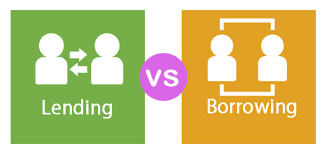

In [7]:
## As per given buisness domain , here three stackholders are there,1) Borrower, 2) lender and 3) Investor
## So as per given problem statment we have to find loan application which come under defaulter.
## Therefore there are lots of columns are there which have data after acceptance of loan, which is not required in our analysis.

### After going through the given dataset with given data column defination 'Loan Status' is our target variable.

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

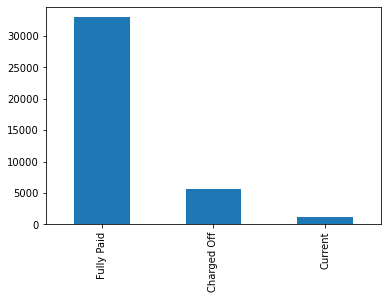

In [8]:
loan['loan_status'].value_counts().plot.bar()
loan['loan_status'].value_counts()

In [9]:
## As per business understanding we have three types borrower 
## Fully Paid : Who had given all loan amount.
## Charged Off : Who had come under defaulter.
## Current : Who are under process of giving there loan amount.
## So, As per above category 'current' status is not required in our analysis 
## because they have probability of 50% to go into any stage of Fully Paid and Defaulter

In [10]:
loan.drop(loan[loan.loan_status=='Current'].index,axis=0,inplace=True)

In [11]:
loan.shape

(38577, 111)

# <a id='2'>2.Data Cleaning and Manipulation</a>

In [12]:
## As we can see that there is lots of missing value in given dataset and lots of columns having 100 % of null values.
## Lets drop that columns

In [13]:
## Function for missing value dataframe
def missing_value(df):
    '''
    df: DateFrame 
    '''
    missing_val_df = pd.DataFrame({
    'Missing_Count':df.isnull().sum(),
    'Missing_Percentage':(df.isnull().sum()/df.shape[0])*100
    })
    return missing_val_df

In [14]:
clean_col = missing_value(loan)
clean_col

,Missing_Count,Missing_Percentage
id,0,0.000000
member_id,0,0.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


In [15]:
## lets drop the column having missing value more then 30%, which is thresold for our dataset.
## Becasue imputing the missing value of column having more then 30% which lead to biasness. 

In [16]:
loan.drop(clean_col[clean_col.Missing_Percentage>=30].index,axis=1,inplace=True)

In [17]:
loan.shape

(38577, 53)

In [18]:
## Check Missing Value Again

In [19]:
clean_col = missing_value(loan)
clean_col

,Missing_Count,Missing_Percentage
id,0,0.000000
member_id,0,0.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


In [20]:
## Column with missing value more then 0
clean_col[clean_col.Missing_Percentage>0]

,Missing_Count,Missing_Percentage
emp_title,2386,6.185033
emp_length,1033,2.677761
title,11,0.028514
revol_util,50,0.129611
last_pymnt_d,71,0.184047
last_credit_pull_d,2,0.005184
collections_12_mths_ex_med,56,0.145164
chargeoff_within_12_mths,56,0.145164
pub_rec_bankruptcies,697,1.806776
tax_liens,39,0.101097


In [21]:
## Before working on these given column, As per business understanding if will help in analysis then we will work on it.
## Or we can delete it

In [22]:
col_def[col_def.LoanStatNew.isin(clean_col[clean_col.Missing_Percentage>0].index)]

,LoanStatNew,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
10,chargeoff_within_12_mths,Number of charge-offs within 12 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,collections_12_mths_ex_med,Number of collections in 12 months excluding m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,emp_length,Employment length in years. Possible values ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,emp_title,The job title supplied by the Borrower when ap...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,last_credit_pull_d,The most recent month LC pulled credit for thi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,last_pymnt_d,Last month payment was received,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,pub_rec_bankruptcies,Number of public record bankruptcies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,revol_util,"Revolving line utilization rate, or the amount...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,tax_liens,Number of tax liens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,title,The loan title provided by the borrower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
## As per given defination column'(chargeoff_within_12_mths,collections_12_mths_ex_med,emp_title,last_credit_pull_d,last_pymnt_d,tax_liens)'
## Are not required in analysis so no need to work on missing value treatment we can drop that column.

In [24]:
loan.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med','emp_title','last_credit_pull_d','last_pymnt_d','tax_liens'],axis=1,inplace=True)

In [25]:
loan.shape

(38577, 47)

In [26]:
clean_col = missing_value(loan)
clean_col

,Missing_Count,Missing_Percentage
id,0,0.000000
member_id,0,0.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


In [27]:
clean_col[clean_col.Missing_Percentage>0]

,Missing_Count,Missing_Percentage
emp_length,1033,2.677761
title,11,0.028514
revol_util,50,0.129611
pub_rec_bankruptcies,697,1.806776


In [28]:
## Now we have left with only 4 column for missing value treatment
## let work on each column one by one

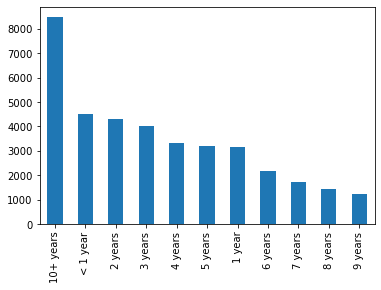

In [29]:
## Column : emp_length
loan['emp_length'].value_counts()
loan['emp_length'].value_counts().plot.bar()

In [30]:
loan['emp_length'].unique() # there is nan as unique value let impute with it has 'self_employ'

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [31]:
loan['emp_length'] = loan['emp_length'].fillna('self_employ')

In [32]:
## Check missing value
print('Null Value : ',loan['emp_length'].isnull().sum())

Null Value :  0


In [33]:
## Column : title
loan['title'].value_counts()

Debt Consolidation                      2090
Debt Consolidation Loan                 1620
Personal Loan                            641
Consolidation                            491
debt consolidation                       478
                                        ... 
HORIZON IN SIGHT                           1
Securing Future Loan                       1
Elementary School Teacher Needs Help       1
Refi for lower rate on existing debt       1
yankees                                    1
Name: title, Length: 19297, dtype: int64

In [34]:
## As in given title column there is duplication with of word with other words like Debt Consolidation 
## So we can impute the given column with mode of this column

In [35]:
loan['title'] = loan['title'].fillna(loan['title'].mode()[0])

In [36]:
print('Null Value : ',loan['title'].isnull().sum())

Null Value :  0


In [37]:
## Column : revol_util
loan['revol_util'].value_counts()

0%        954
63%        62
0.20%      62
31.20%     57
40.70%     57
         ... 
57.56%      1
16.02%      1
7.43%       1
43.61%      1
33.39%      1
Name: revol_util, Length: 1088, dtype: int64

In [38]:
## Given Data Column have % as sign before that we have to convert it into conitnous variable
## Lets do Manipulation of revol_util column

In [39]:
loan['revol_util'] = loan['revol_util'].apply(lambda x: float(str(x).replace('%','')) if not pd.isna(x) else  x)

In [40]:
loan['revol_util'].value_counts()

0.00     954
63.00     62
0.20      62
40.70     57
31.20     57
        ... 
24.63      1
26.33      1
11.62      1
70.26      1
0.49       1
Name: revol_util, Length: 1088, dtype: int64

In [41]:
loan['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [42]:
## As per given information about revol_util column there is no outlier
## so we can impute it with median as its not get affected by outlier

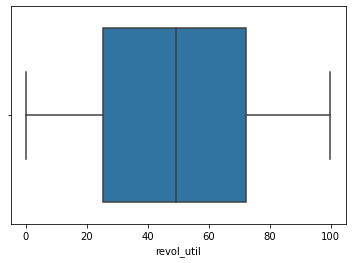

In [43]:
sns.boxplot(loan['revol_util'])
plt.show()

## Insight 
   ### As per given box plot there is no outlier

In [44]:
loan['revol_util'] = loan['revol_util'].fillna(loan['revol_util'].median())

In [45]:
print('Null Value : ',loan['revol_util'].isnull().sum())

Null Value :  0


0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

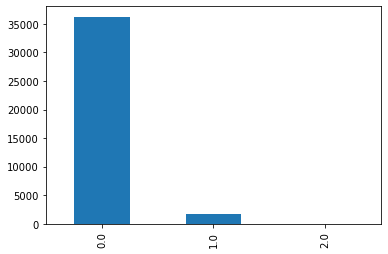

In [46]:
## Column : pub_rec_bankruptcies
loan['pub_rec_bankruptcies'].value_counts().plot.bar()
loan['pub_rec_bankruptcies'].value_counts()

In [47]:
## As given column we can use mode of that column to fill the missing value
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].mode()[0])

In [48]:
loan['pub_rec_bankruptcies'].isnull().sum()

0

In [49]:
clean_col = missing_value(loan)
clean_col

,Missing_Count,Missing_Percentage
id,0,0.0
member_id,0,0.0
loan_amnt,0,0.0
funded_amnt,0,0.0
funded_amnt_inv,0,0.0
term,0,0.0
int_rate,0,0.0
installment,0,0.0
grade,0,0.0
sub_grade,0,0.0


### Now we have completed with all missing value treatment.

## <a id='2.1'>2.1.Irrelevent column removal as per business understanding</a>

In [50]:
## As id,member_id,url,policy_code,zip_code,zip_code,recoveries not required in analysis
## lets drop these column

In [51]:
loan.drop(['id','member_id','url','policy_code','zip_code','recoveries'],axis=1,inplace=True)

In [52]:
loan.shape

(38577, 41)

In [53]:
## As per data dictionary defination of given column there is many column having Customer Behaviour Data.
## Which is not present at time of loan application so we have to remove that column from our data set.

## Customer Behaviour Variables
### Variables : [delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv
### total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt]

In [54]:
loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv',
'total_rec_prncp','total_rec_int','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt'],axis=1,inplace=True)

In [55]:
loan.shape

(38577, 26)

## <a id='2.2'>2.2.Data Manipulation of given dataset</a>

In [56]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,initial_list_status,out_prncp,out_prncp_inv,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,f,0.0,0.0,INDIVIDUAL,0,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,f,0.0,0.0,INDIVIDUAL,0,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,f,0.0,0.0,INDIVIDUAL,0,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,f,0.0,0.0,INDIVIDUAL,0,0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,AZ,11.20,f,0.0,0.0,INDIVIDUAL,0,0,0.0


In [57]:
## As we can int_rate column have % sign so lets treat them

In [58]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(str(x).replace('%','')) if not pd.isna(x) else  x)

In [59]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,initial_list_status,out_prncp,out_prncp_inv,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,f,0.0,0.0,INDIVIDUAL,0,0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,f,0.0,0.0,INDIVIDUAL,0,0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,f,0.0,0.0,INDIVIDUAL,0,0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,f,0.0,0.0,INDIVIDUAL,0,0,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,AZ,11.20,f,0.0,0.0,INDIVIDUAL,0,0,0.0


In [60]:
## As we can see that there is many column having single unique value which will not give any insight 
## Lets drop that column having single unique value

In [61]:
loan.nunique()

loan_amnt                 870
funded_amnt              1019
funded_amnt_inv          8050
term                        2
int_rate                  370
installment             15022
grade                       7
sub_grade                  35
emp_length                 12
home_ownership              5
annual_inc               5215
verification_status         3
issue_d                    55
loan_status                 2
pymnt_plan                  1
purpose                    14
title                   19297
addr_state                 50
dti                      2853
initial_list_status         1
out_prncp                   1
out_prncp_inv               1
application_type            1
acc_now_delinq              1
delinq_amnt                 1
pub_rec_bankruptcies        3
dtype: int64

In [62]:
loan_unique = loan.copy()
unique_value = loan_unique.nunique()
col_value_unique = unique_value[unique_value.values == 1]
col_value_unique_name = col_value_unique.index.to_list()
loan.drop(col_value_unique_name, axis=1,inplace=True)

In [63]:
loan.shape

(38577, 19)

In [64]:
## Convert Date to in month and year column

In [65]:
loan['month'], loan['year']  = loan['issue_d'].str.split('-', 1).str

In [66]:
## Convert loan status column
loan['defaulters'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1).astype(int)

## <a id='2.3'>2.3.Derived Metrics for analysis</a>

In [67]:
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']

# <a id='3.0'>3.Data Analysis</a>

In [68]:
## Before starting with analysis on pre-processed dataset, we have to segregate the 
## 1) Continous Variable and 2) Categorical Variable
#-------------------------------------------------------
## We will do Univariate Analysis and Bivariate Analysis in data analysis segment. 

### Continous Variable Segment

In [69]:
Cont_Var = loan.describe().columns

In [70]:
Cont_Var

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'defaulters', 'loan_income_ratio'], dtype='object')

### Categorical Variable Segment

In [71]:
Cat_Var = list(set(loan.columns)- set(loan.describe().columns))

In [72]:
Cat_Var

['month',
 'purpose',
 'emp_length',
 'term',
 'issue_d',
 'title',
 'addr_state',
 'grade',
 'home_ownership',
 'loan_status',
 'year',
 'sub_grade',
 'verification_status']

# <a id='3.1'>3.1.Univariate Analysis</a>
## In Univariate Analysis, we will do analysis on Continous and Categorical Variables
## Continous Variable : In this we do Central Tendency Check of variable like mean , median, mode and will also do outlier detection.
## Categorical Variable : In this we do frequency or count of column.

In [73]:
## DataFrame for Continous Variable
cont_var_df = loan[Cont_Var]
cont_var_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,defaulters,loan_income_ratio
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,0,0.208333
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,1,0.083333
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,0,0.195886
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,0,0.203252
5,5000,5000,5000.0,7.90,156.46,36000.0,11.20,0.0,0,0.138889


In [74]:
## DataFrame for Catogorical Variable
cat_var_df = loan[Cat_Var]
cat_var_df.head()

,month,purpose,emp_length,term,issue_d,title,addr_state,grade,home_ownership,loan_status,year,sub_grade,verification_status
0,Dec,credit_card,10+ years,36 months,Dec-11,Computer,AZ,B,RENT,Fully Paid,11,B2,Verified
1,Dec,car,< 1 year,60 months,Dec-11,bike,GA,C,RENT,Charged Off,11,C4,Source Verified
2,Dec,small_business,10+ years,36 months,Dec-11,real estate business,IL,C,RENT,Fully Paid,11,C5,Not Verified
3,Dec,other,10+ years,36 months,Dec-11,personel,CA,C,RENT,Fully Paid,11,C1,Source Verified
5,Dec,wedding,3 years,36 months,Dec-11,My wedding loan I promise to pay back,AZ,A,RENT,Fully Paid,11,A4,Source Verified


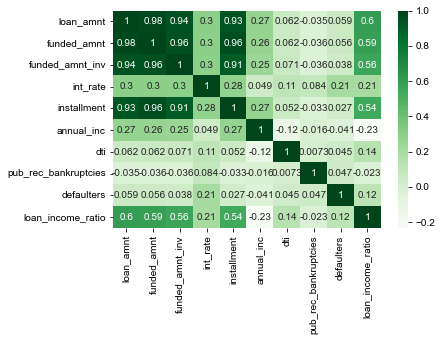

In [75]:
sns.heatmap(cont_var_df.corr(), annot=True, cmap = 'Greens')
sns.set(rc={'figure.figsize':(50,15)})

In [76]:
## Insights:
### As we can see that loan_amnt,funded_amnt,funded_amnt_inv are correleted with each 
### And these can be treated as one variable as funded_amnt because this final loan approved amount. 

In [77]:
loan.drop(['loan_amnt','funded_amnt'],axis=1,inplace=True)

In [78]:
int_varibales = loan.loc[:, loan.dtypes == 'int64'].columns
float_varibales = loan.loc[:, loan.dtypes == 'float64'].columns

In [79]:
loan[int_varibales] = loan[int_varibales].apply(pd.to_numeric)
loan[float_varibales] = loan[float_varibales].apply(pd.to_numeric)

In [80]:
loan.shape

(38577, 21)

In [81]:
## Final Continous Variable are:
Cont_Var = loan.describe().columns
Cont_Var

Index(['funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'defaulters', 'loan_income_ratio'], dtype='object')

In [82]:
## DataFrame for Continous Variable
cont_var_df = loan[Cont_Var]
cont_var_df.head()

,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,defaulters,loan_income_ratio
0,4975.0,10.65,162.87,24000.0,27.65,0.0,0,0.208333
1,2500.0,15.27,59.83,30000.0,1.00,0.0,1,0.083333
2,2400.0,15.96,84.33,12252.0,8.72,0.0,0,0.195886
3,10000.0,13.49,339.31,49200.0,20.00,0.0,0,0.203252
5,5000.0,7.90,156.46,36000.0,11.20,0.0,0,0.138889


# <a id='3.1'>3.2.Univariate Analysis on Continous Variables</a>

## Lets start working on univariate analysis on given continous variable

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

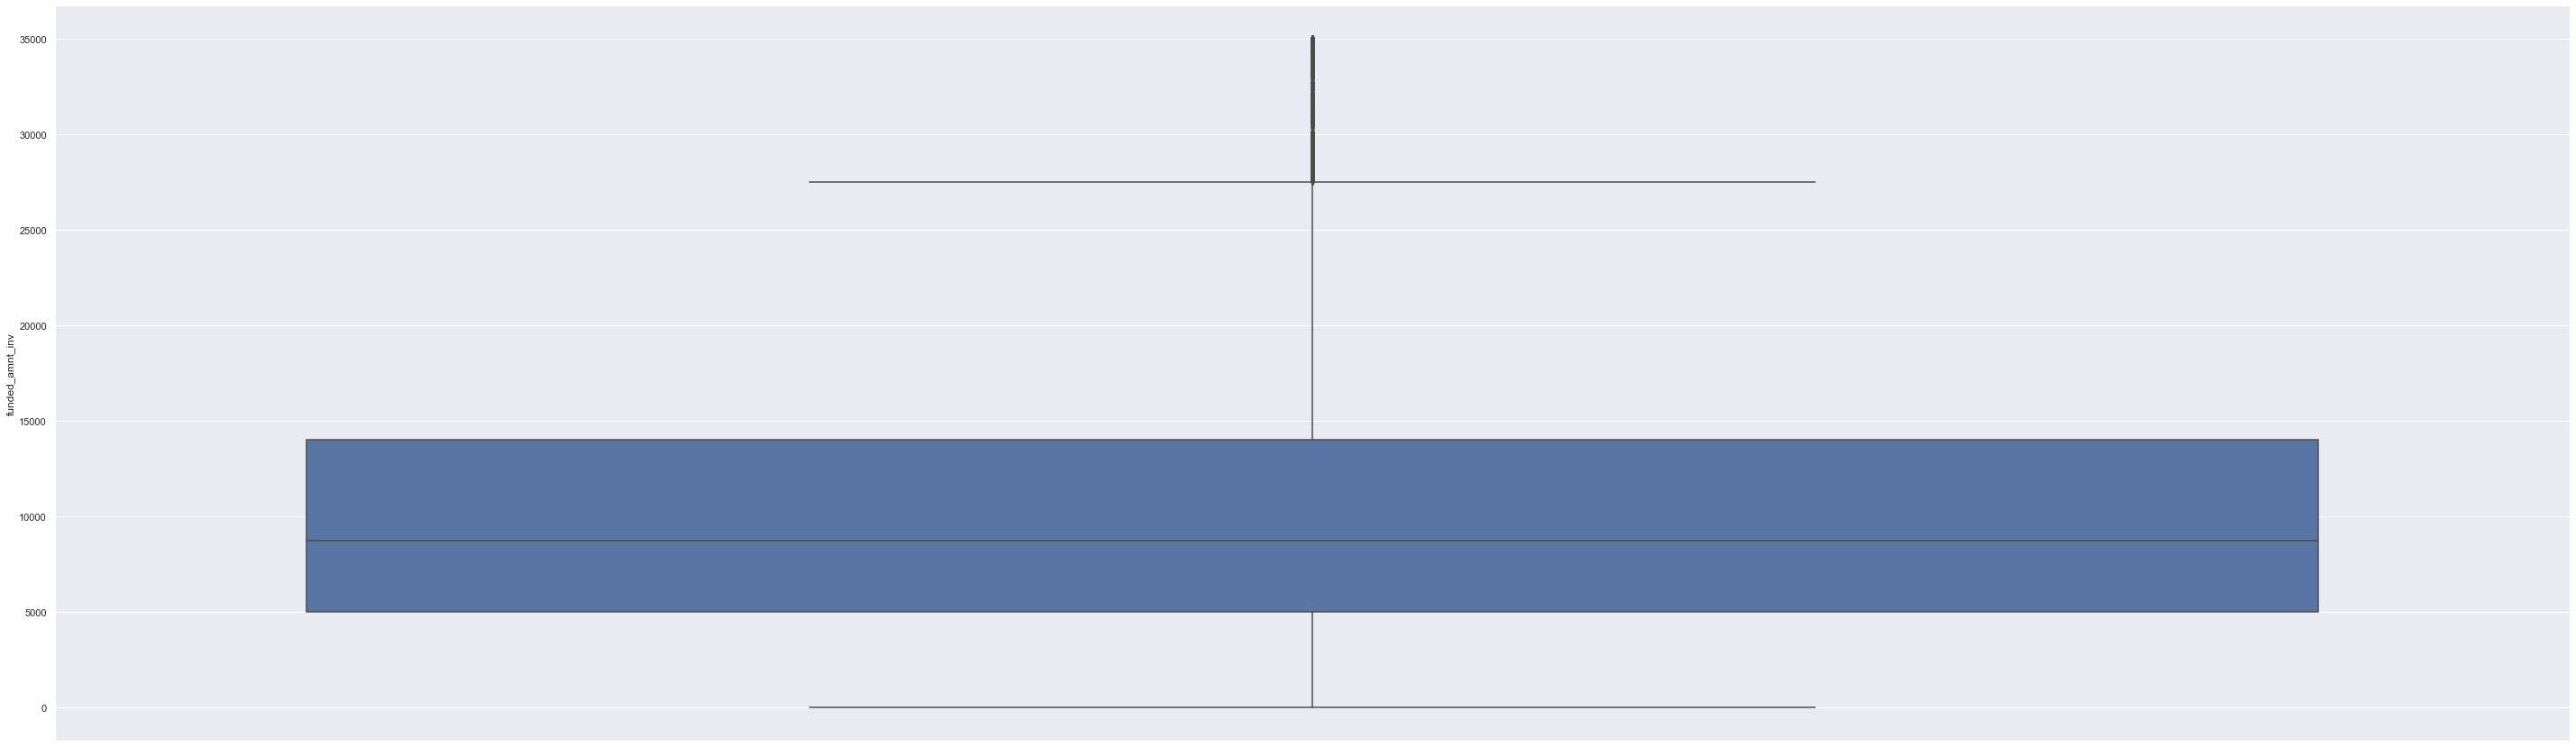

In [83]:
sns.boxplot(y = cont_var_df.funded_amnt_inv)
sns.set(rc={'figure.figsize':(20,5)})
cont_var_df.funded_amnt_inv.describe()

In [84]:
### :- Insights : As in given boxplot median value are 8733 but max value are 35000 ,so it contains outlier
### :- Recommandation : we have to remove the outlier, by using IQR quantile or z-score methedology

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

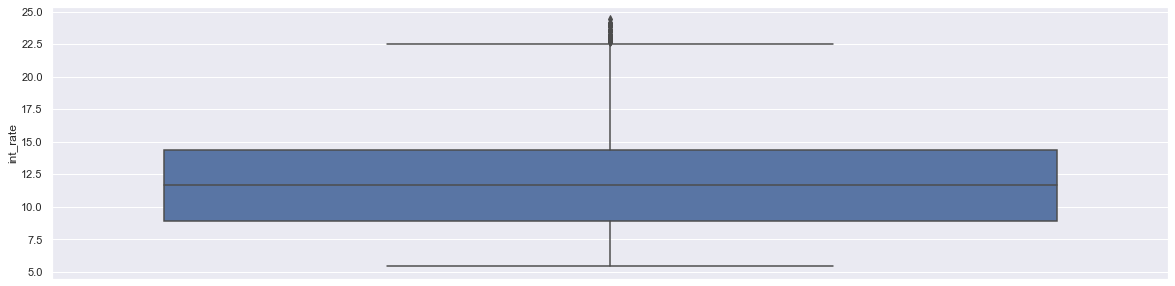

In [85]:
sns.boxplot(y = cont_var_df.int_rate)
sns.set(rc={'figure.figsize':(20,5)})
cont_var_df.int_rate.describe()

In [86]:
### :- Insights : As in given boxplot median value are 11 but max value are 24 ,so it contains outlier
### :- Recommandation : we have to remove the outlier, by using IQR quantile or z-score methedology

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

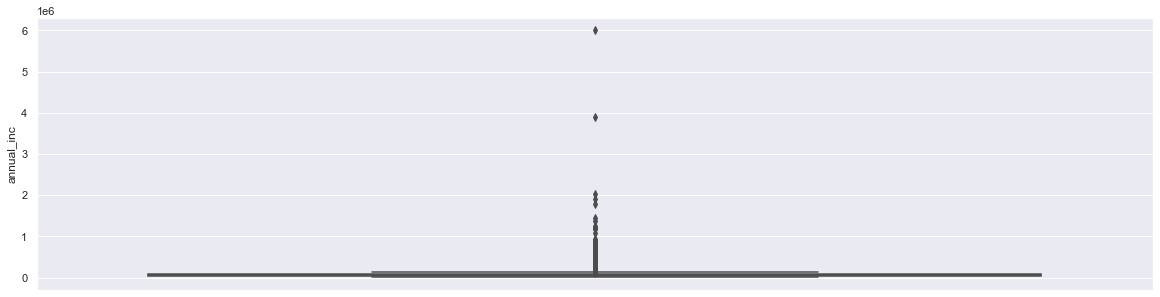

In [87]:
sns.boxplot(y = cont_var_df.annual_inc)
sns.set(rc={'figure.figsize':(20,5)})
cont_var_df.annual_inc.describe()

In [88]:
### :- Insights : As in given boxplot median value are more less then max value ,so it contains outlier
### :- Recommandation : we have to remove the outlier, by using IQR quantile or z-score methedology

## Lets see how to remove the outlier from annual income

In [89]:
## Find IQR
Q1 = cont_var_df["annual_inc"].quantile(0.25)
Q3 = cont_var_df["annual_inc"].quantile(0.75)
IQR = Q3 - Q1
upper_value = Q3 + 1.5*IQR

In [90]:
###
cont_var_df = cont_var_df[cont_var_df["annual_inc"] < upper_value]
cont_var_df["annual_inc"].describe().apply(lambda x: format(x, 'f'))

count     36754.000000
mean      61079.142225
std       28040.679299
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      144997.000000
Name: annual_inc, dtype: object

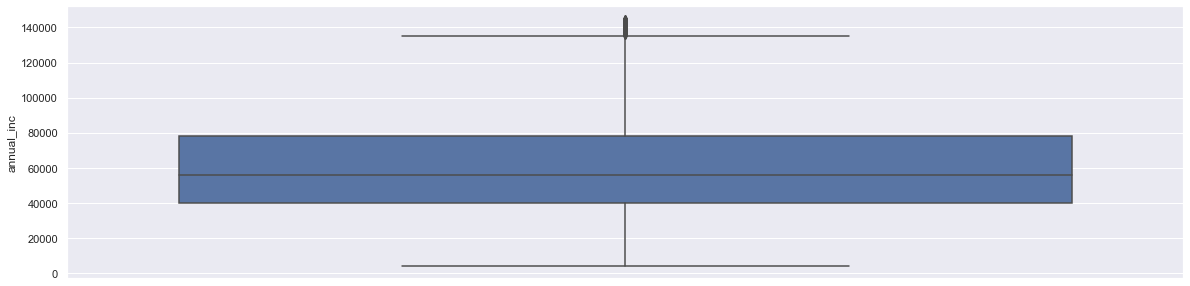

In [91]:
sns.boxplot(y = cont_var_df.annual_inc)
sns.set(rc={'figure.figsize':(20,5)})

## As we can see that after removing outlier from annual income data gets changed

# <a id='3.3'>3.3.Univariate Analysis on Categorical Variables</a>

In [92]:
cat_var_df.head(2)

,month,purpose,emp_length,term,issue_d,title,addr_state,grade,home_ownership,loan_status,year,sub_grade,verification_status
0,Dec,credit_card,10+ years,36 months,Dec-11,Computer,AZ,B,RENT,Fully Paid,11,B2,Verified
1,Dec,car,< 1 year,60 months,Dec-11,bike,GA,C,RENT,Charged Off,11,C4,Source Verified


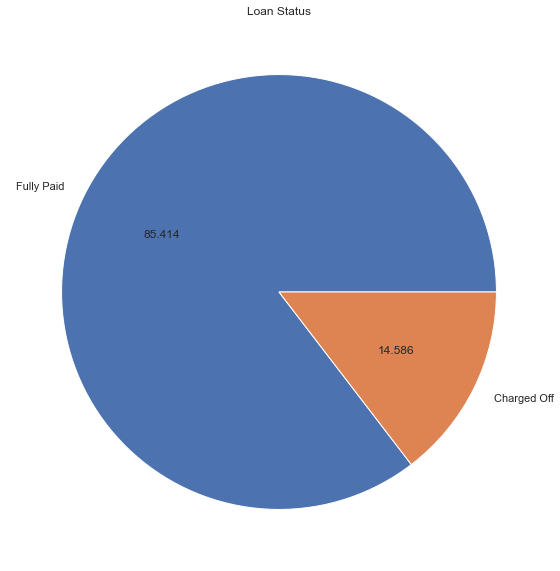

In [93]:
# Loan Status
plt.figure(figsize=(10,10))
plt.pie(cat_var_df['loan_status'].value_counts(), autopct='%.3f', labels=cat_var_df['loan_status'].value_counts().index)
plt.title('Loan Status')
plt.show()

## Out of total loan application 85 % are fully paid and 15 % are get defaulted

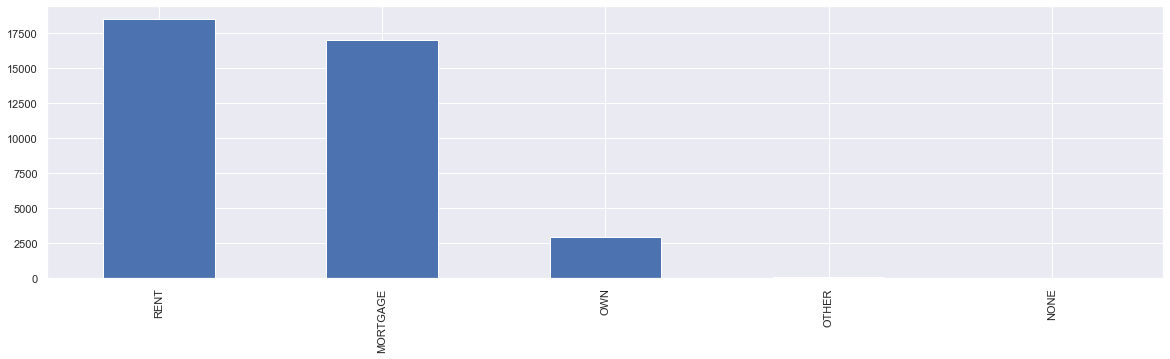

In [94]:
# Home Ownership
cat_var_df['home_ownership'].value_counts().plot.bar()
#Most of the employee who has taken loan are currently living in rental and mortgage houses

In [95]:
### Most of the employee who has taken loan are currently living in rental and mortgage houses

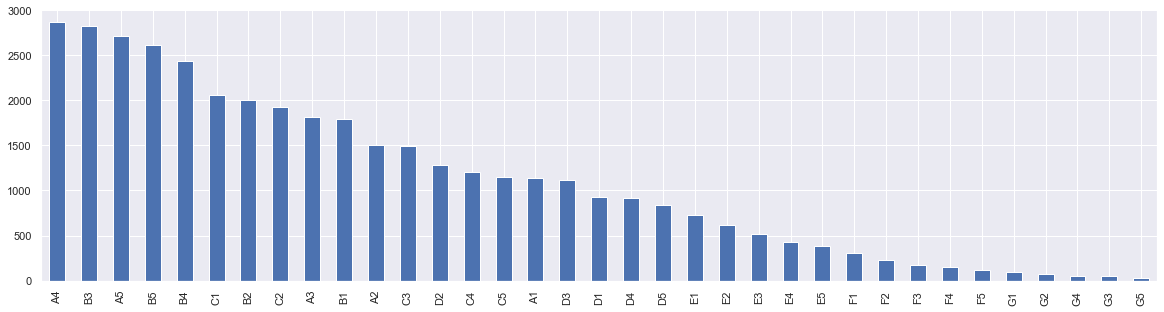

In [96]:
# Home Ownership
cat_var_df['sub_grade'].value_counts().plot.bar()

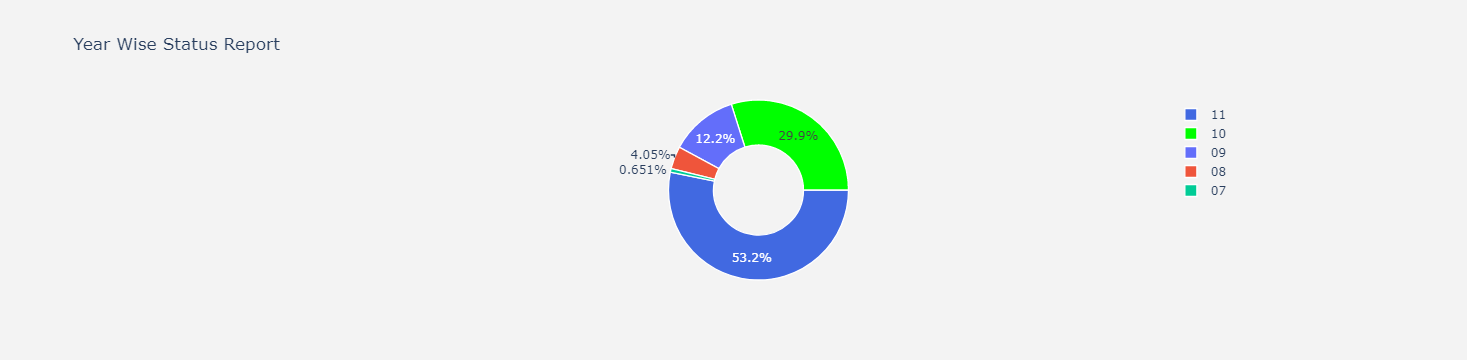

In [97]:
#labels
lab = loan["year"].value_counts().keys().tolist()
#values
val = loan["year"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Year Wise Status Report",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [98]:
### In the year 2011 most of the employess as taken loan, in 2007 very few employees shown interest in taking loan

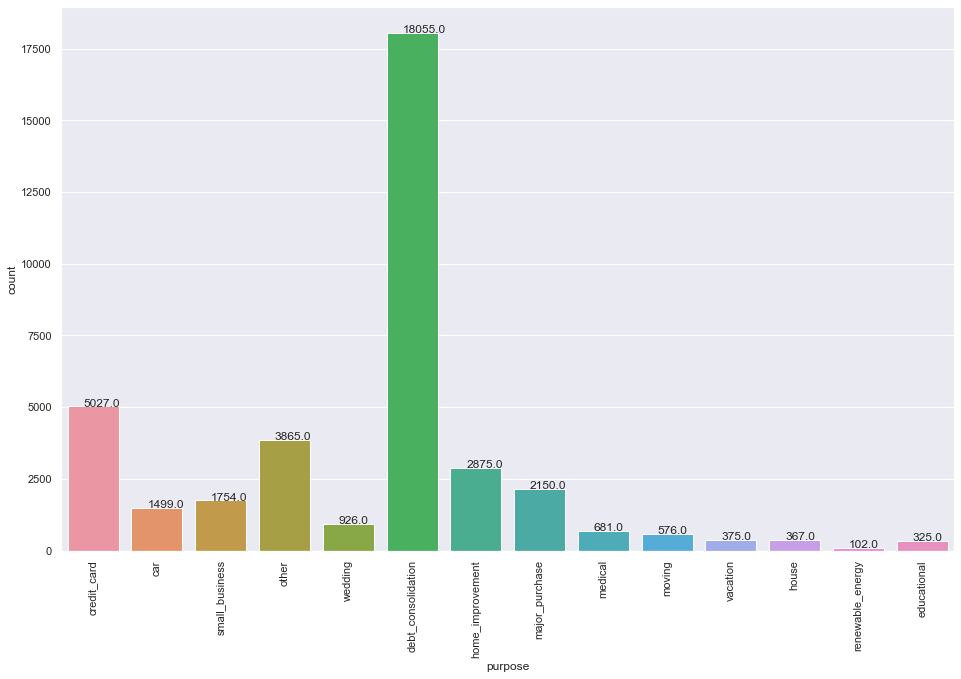

In [99]:
# Purpose of the loan
fig = plt.figure(figsize=(16,10))
ax = sns.countplot(cat_var_df['purpose'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation = 90)
plt.show()

In [100]:
### :Insight --- As we can see that more number of loan application come for debt consolidation

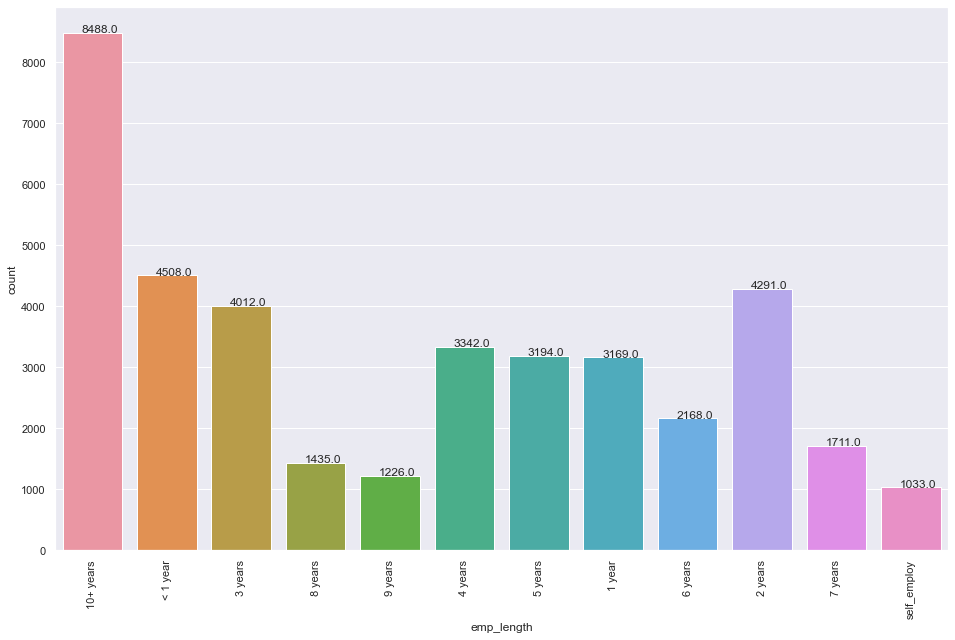

In [101]:
# Purpose of the loan
fig = plt.figure(figsize=(16,10))
ax = sns.countplot(cat_var_df['emp_length'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation = 90)
plt.show()

In [102]:
## :- Insights--- As we can see more number loan application coming with more then 10+ year of employment 

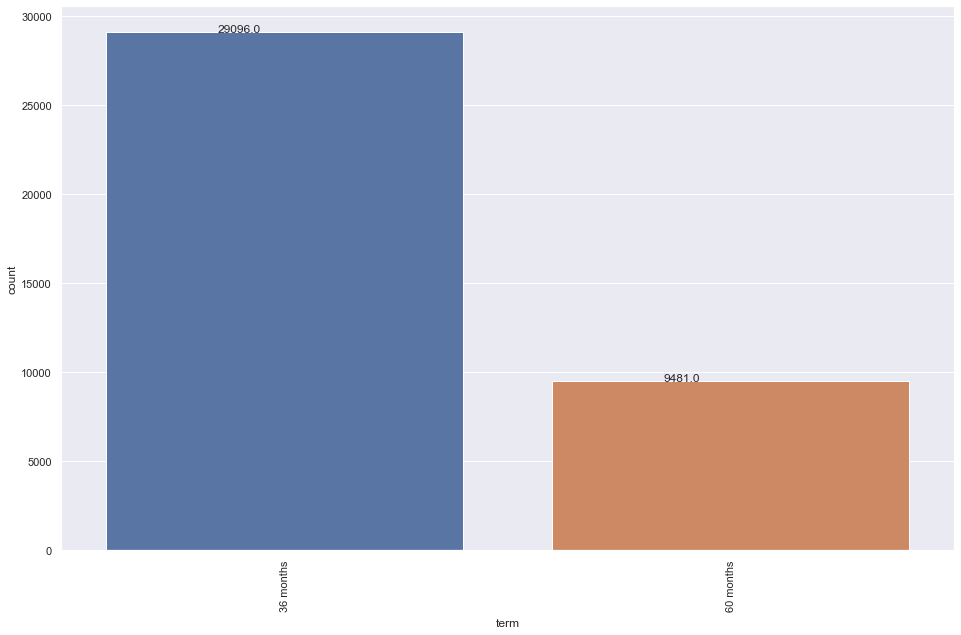

In [103]:
# Purpose of the loan
fig = plt.figure(figsize=(16,10))
ax = sns.countplot(cat_var_df['term'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation = 90)
plt.show()

In [104]:
## :-Insights --- As we can see there are 75 % applicants are applying for 36 months of term

# <a id='3.4'>3.4.Bivariate Analysis </a>

In [105]:
## As we can get from problem statement loan status is target variable from which 
## we have to find insights or predictor

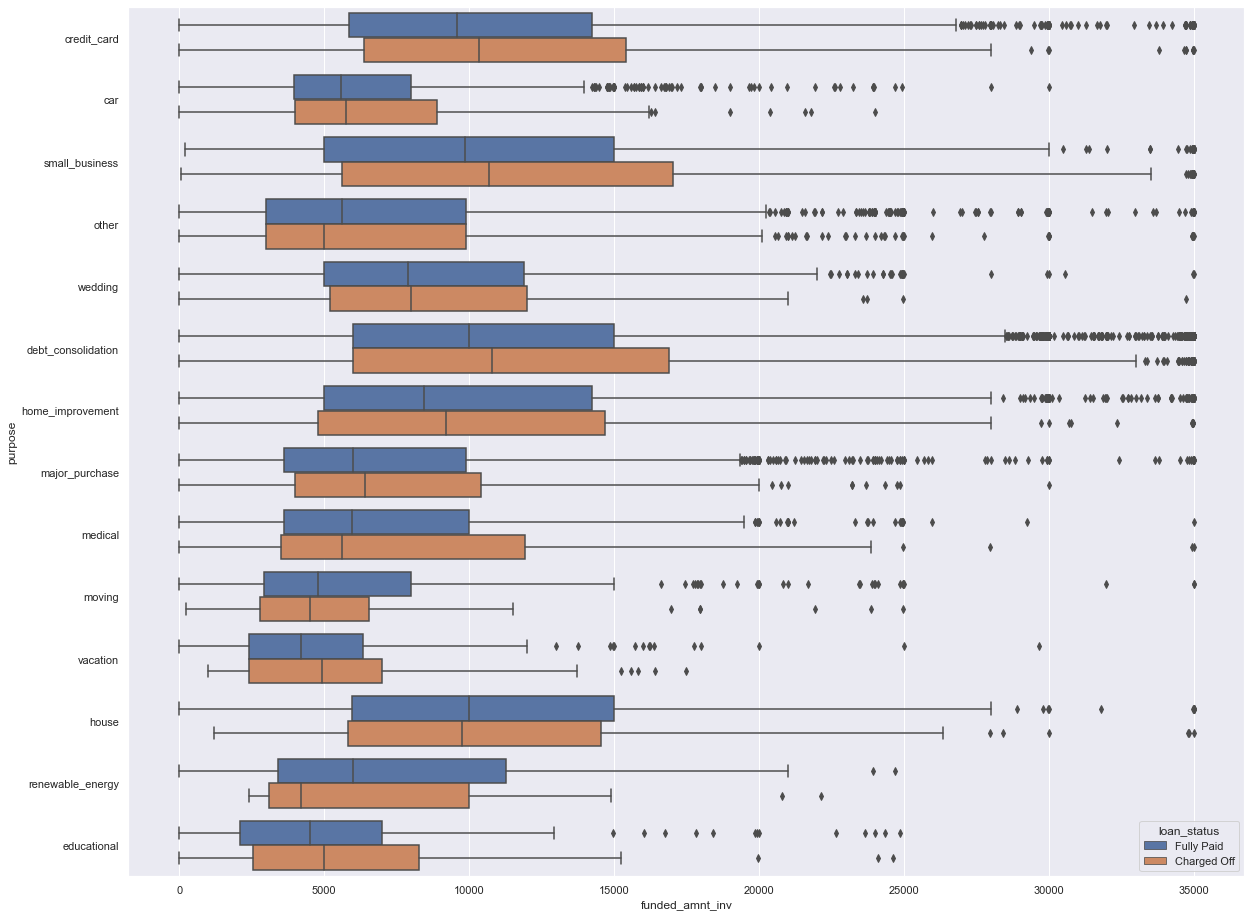

In [106]:
plt.figure(figsize=(20,16))
sns.boxplot(data =loan, x='funded_amnt_inv', y='purpose', hue ='loan_status')

In [107]:
## As we can see that when there is debt consolidation come there is chances of getting loan charged off is high
## Same with small business also so we have to check this parameter befor giving the loan

In [108]:
def bivariateAnalysis(col_name):    
    tr0 = go.Bar(
        x = loan[loan["loan_status"]== 'Fully Paid'][col_name].value_counts().index.values,
        y = loan[loan["loan_status"]== 'Fully Paid'][col_name].value_counts().values,
        name='Fully Paid'
    )

    tr1 = go.Bar(
        x = loan[loan["loan_status"]== 'Charged Off'][col_name].value_counts().index.values,
        y = loan[loan["loan_status"]== 'Charged Off'][col_name].value_counts().values,
        name="Charged Off"
    )
    
    data = [tr0, tr1]
    layout = go.Layout(
        title=col_name+' Distribuition'
    )
    fig = go.Figure(data=data, layout=layout)
    fig.update_layout(
    title=go.layout.Title(
        text="Plot <br><sup>"+col_name+" vs loan_status</sup>",
        xref="paper",
        x=0
    ),
        xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text=col_name
            )
        ),
        yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='loan_status'
            )
        )
    )    
    py.iplot(fig)

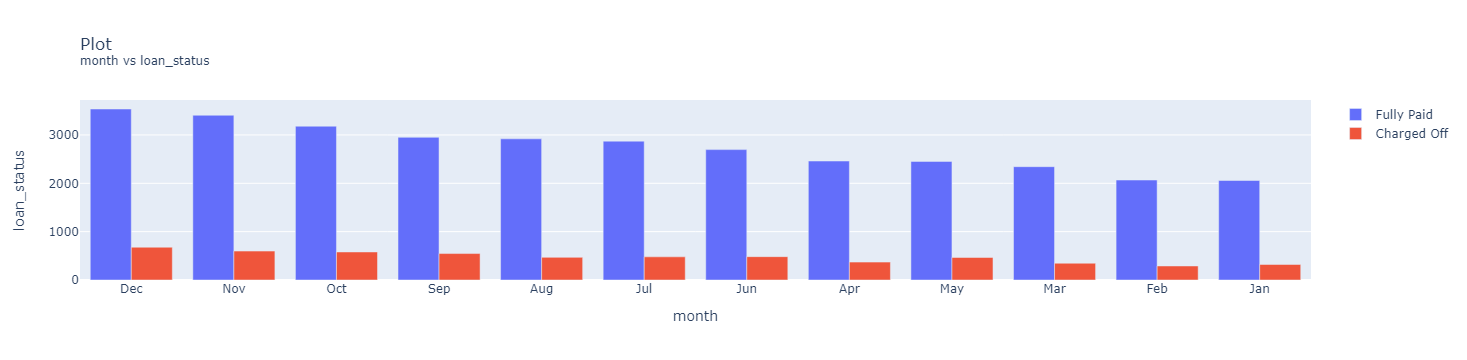

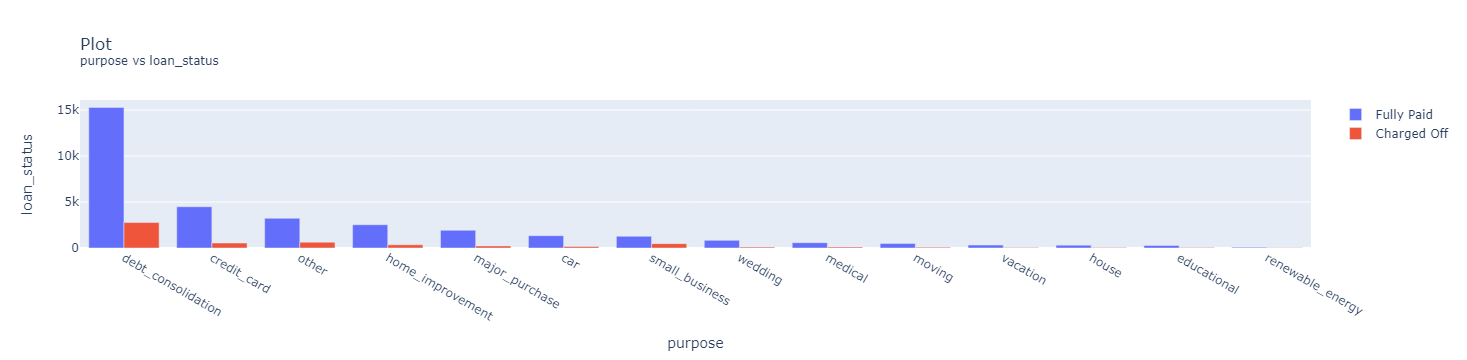

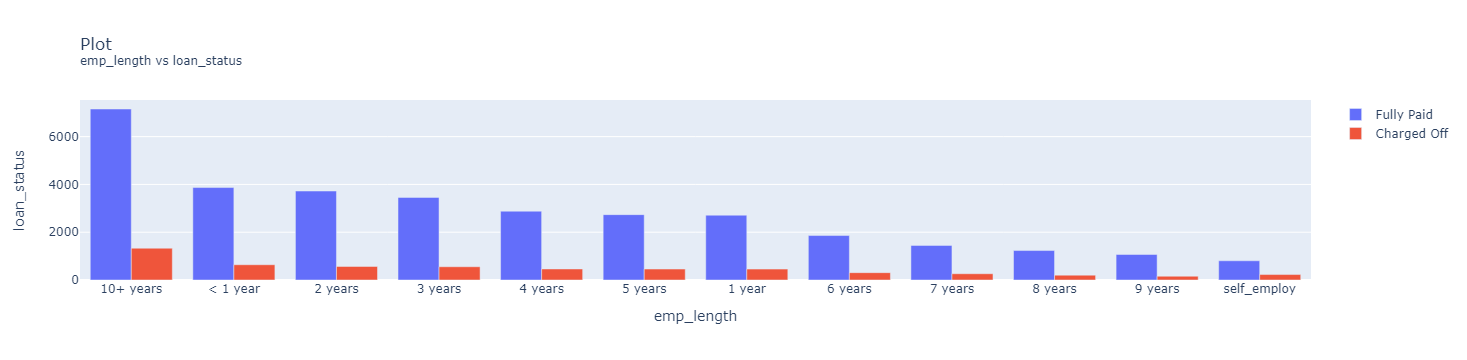

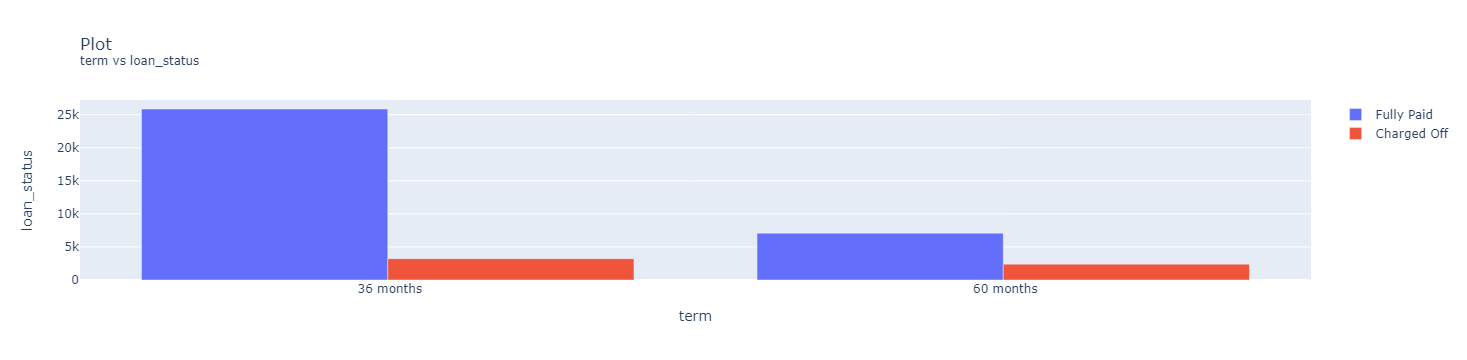

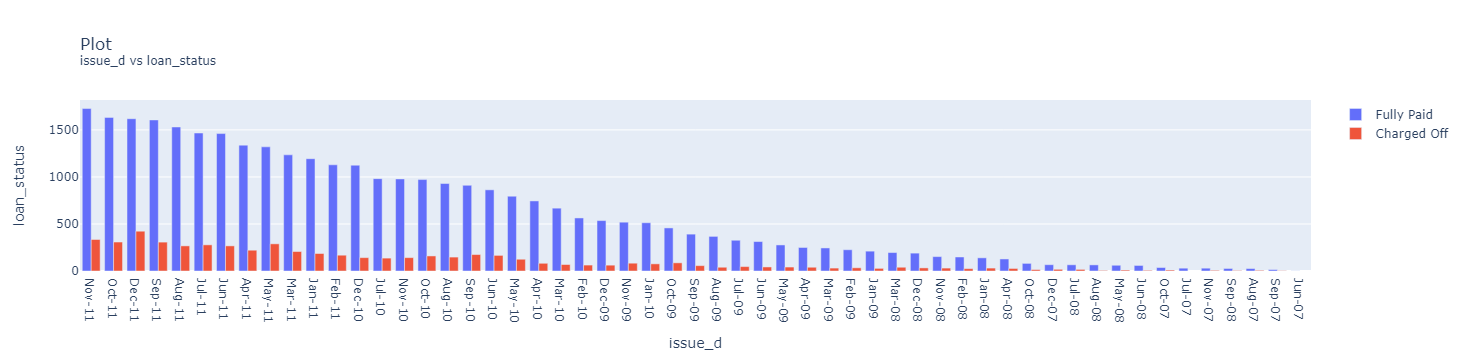

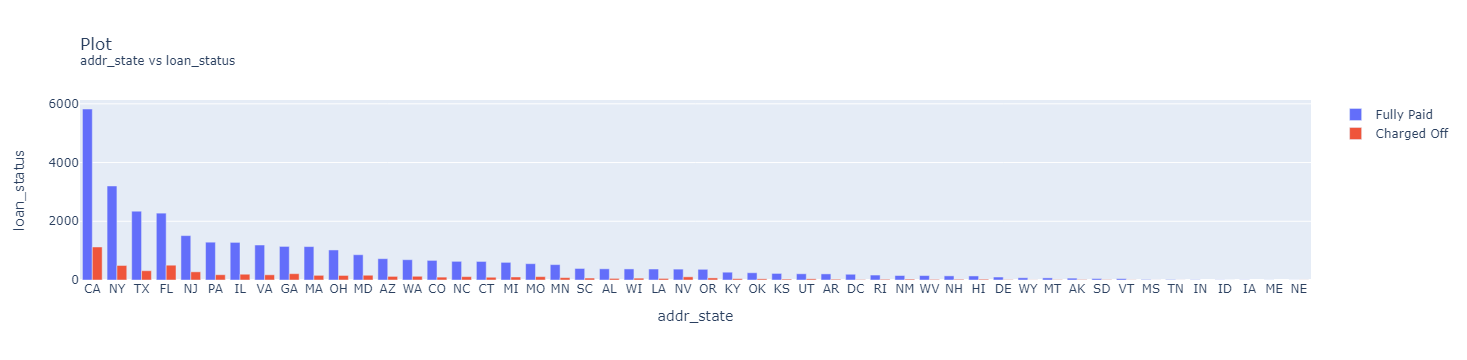

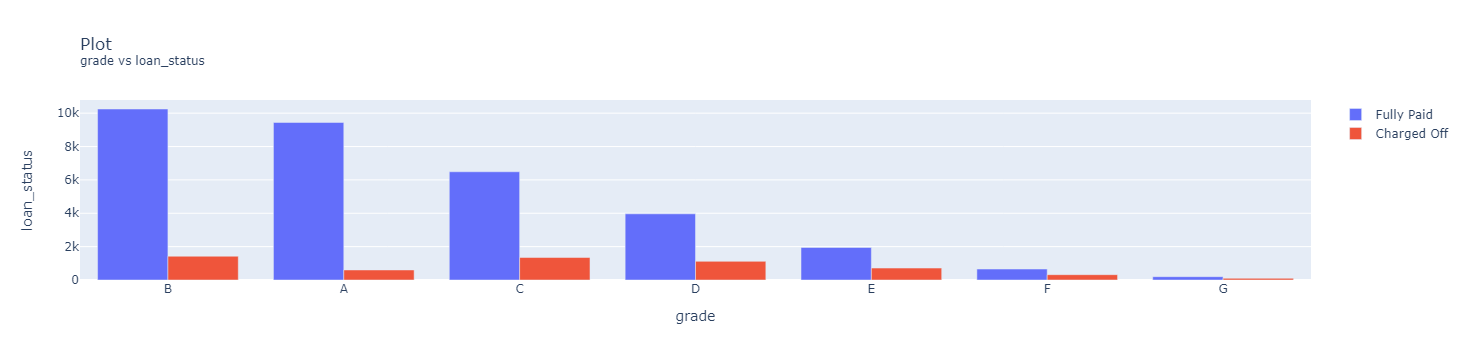

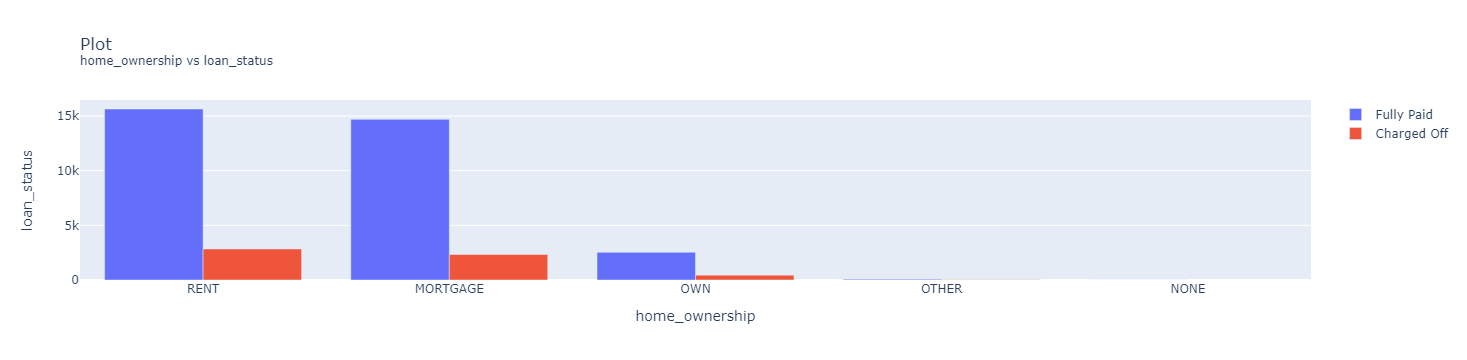

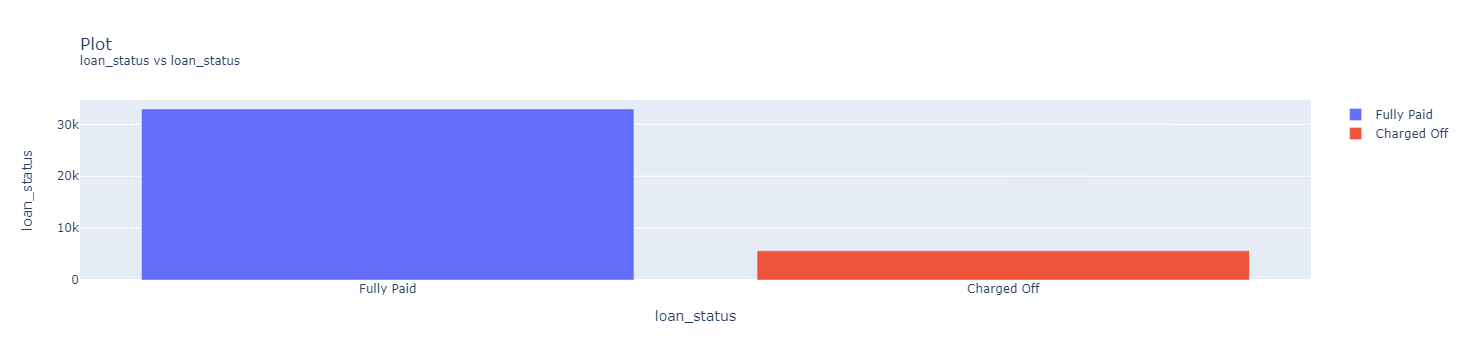

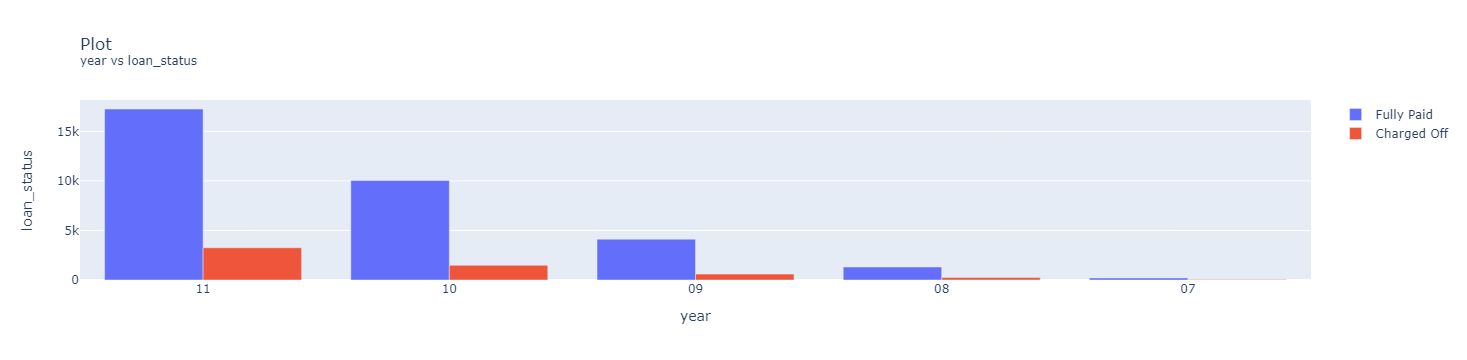

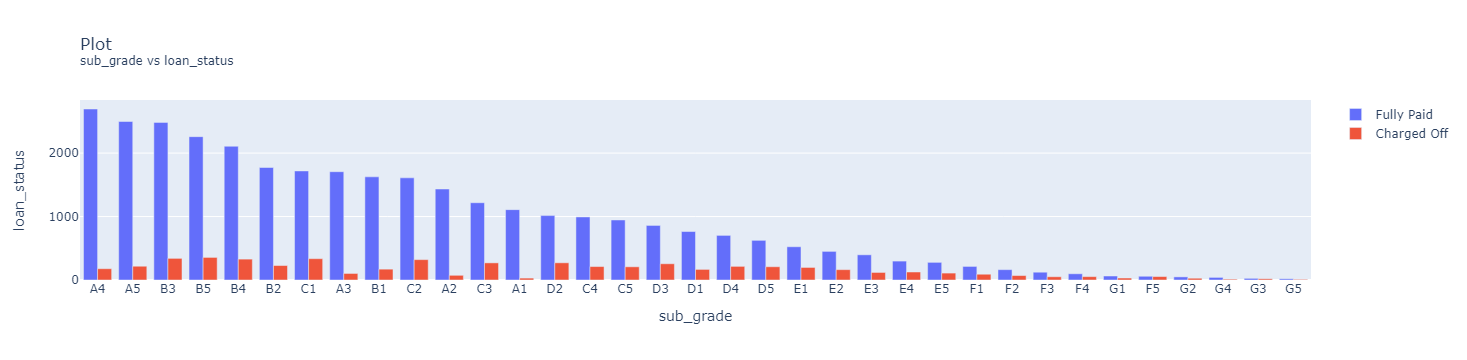

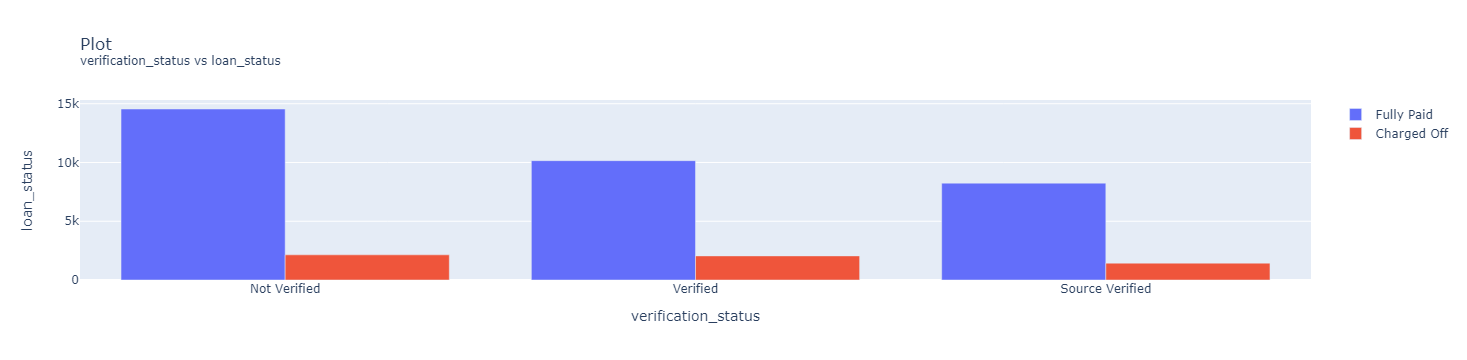

In [109]:
for col in cat_var_df.columns:
    if col!='title':
        bivariateAnalysis(col)

## Insights
### from above graph analysis we have found follwoing insights
### 1) Purpose Vs Loan_Status : As we can see that there more application from debt consolidation gets higher in fully paid.
### 2) Term Vs Loan_Status : As there is more application which having 36 month term paid the full amount of loan.
### 3) Grade Vs Loan_Status : As there is more application from grade B having large propostion in fully paid category.
### 4) Emp Length Vs Loan_Status : As there is more application from higher Employment gets more converted in fully paid. 
### 5) Home Ownership Vs Loan_Status : As we can see that applicant which are on Rent having larger conversion rate in fully paid.
### 6) State Vs Loan_Status : As we can see that from Califorinia State there is more application which having more fully paid category.

In [110]:
## Lets work on some continous variable analysis
## And also do binning of variable

In [111]:
loan['int_rate_cat'] = pd.cut(loan['int_rate'], 4, labels=['low', 'medium', 'high', 'very high'])
loan['fund_amnt_cat'] = pd.cut(loan['funded_amnt_inv'], bins=[loan['funded_amnt_inv'].min(), 5000, 15000, 25000, loan['funded_amnt_inv'].max()], labels=['low', 'medium', 'high', 'very high'])

In [112]:
purpose_top_6 = loan.purpose.value_counts().reset_index()['index'].tolist()[:6]
purpose_top_6

['debt_consolidation',
 'credit_card',
 'other',
 'home_improvement',
 'major_purchase',
 'small_business']

In [113]:
def segmented_plot(df, column, segment_col, filter=None):
    if filter:
        df = df[df[segment_col].isin(filter)].astype({segment_col:'object'})
    sns.barplot(data=df, x=column, y='defaulters', hue=segment_col)

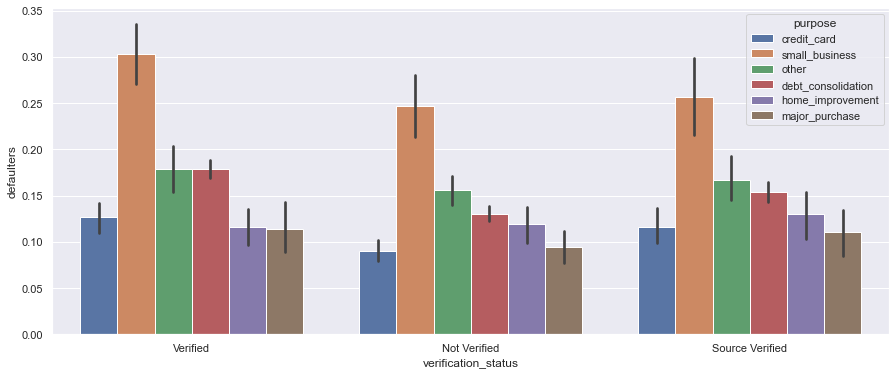

In [114]:
plt.figure(figsize=(15, 6))
segmented_plot(loan, column='verification_status', segment_col='purpose', filter=purpose_top_6)

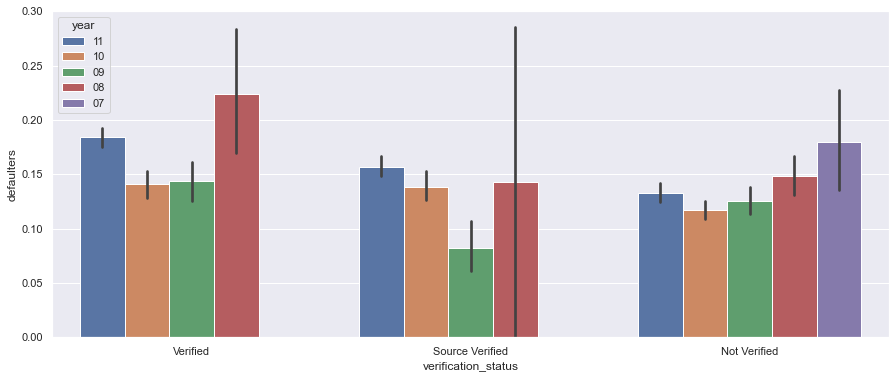

In [115]:
plt.figure(figsize=(15, 6))
segmented_plot(loan, column='verification_status', segment_col='year')

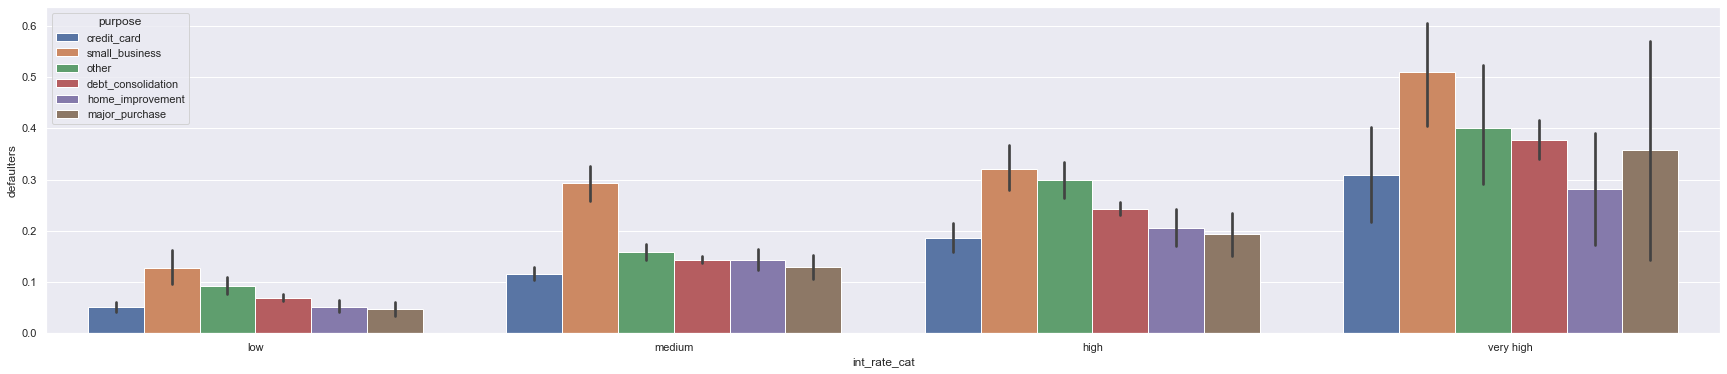

In [116]:
plt.figure(figsize=(30, 6))
segmented_plot(loan, column='int_rate_cat', segment_col='purpose', filter=purpose_top_6)

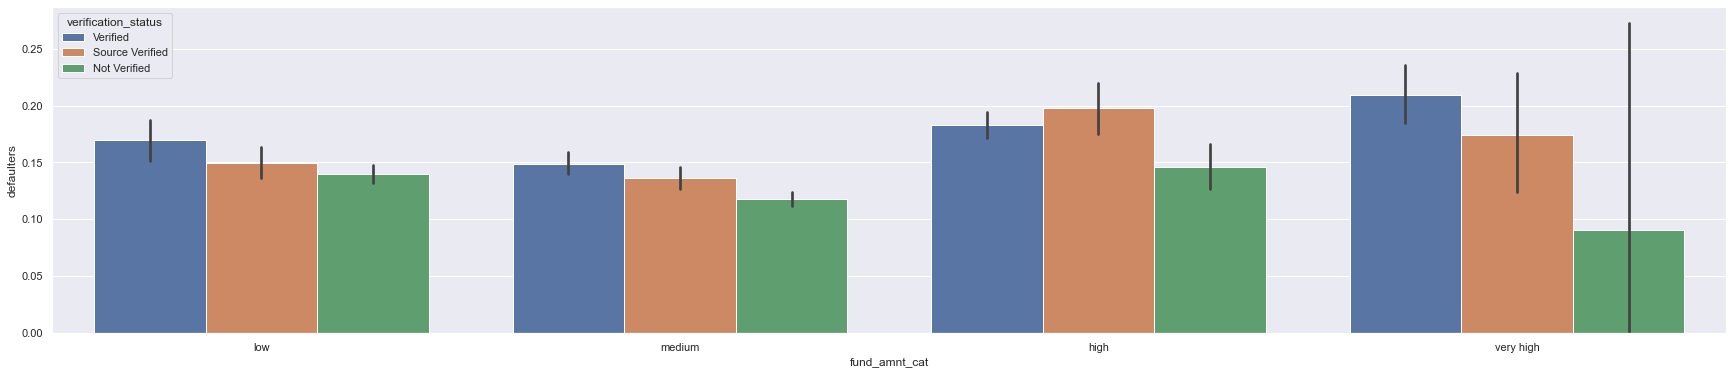

In [117]:
plt.figure(figsize=(30, 6))
segmented_plot(loan, column='fund_amnt_cat', segment_col='verification_status')

In [118]:
### As in interest rate plot 
### we can see that if there is high interest rate then there is higher probability of getting application defaulted.

In [119]:
## As per above given graph analysis we can found that following variables are important for bank to process the application
## 1) Purpose of loan
## 2) Term of loan
## 3) Employment length 
## 4) Grade
## 5) Interest Rate
## 6) Home Ownership

# -------------------------------------Completed-----------------------------------